# Importing Libraries

In [1]:
import pandas as pd
import numpy as np

# Reading data: artist_data, songs_data and artist_data with name

In [2]:
artist_data = pd.read_csv('datasets/ydata-ymusic-user-artist-rating.csv')
songs_data = pd.read_csv('datasets/ydata-ymusic-user-song-rating.csv')
artist_name_data = pd.read_csv('datasets/ydata-ymusic-artist-names.csv')

# calculate avg_rating  and pivot table
- avg_rating is used to see popular items 
- create pivot table to get a new table where the rows represent the user_id, the columns represent the artist_id/song_id and the cells contain the ratings

In [3]:
#Data preprocessing
def data_preprocessing(data, groupByVar, indexId):
    
    #to show popular artist
    avg_rating = pd.DataFrame(data.groupby(groupByVar)['rating'].mean().reset_index())
    avg_rating.sort_values('rating', ascending = False).head(20)
    
    #creating pivot table
    rated_bygroup_by_var = pd.pivot_table(data=data, values='rating', index=indexId, columns=groupByVar)
    
    return rated_bygroup_by_var

# Dropping nan values and sort the data with highest correlation

In [4]:
def data_cleaning(recommended_data):
    
     #data cleaning and sorting
        
    recommended_corr = pd.DataFrame(recommended_data, columns=['Correlation'])
    recommended_corr.dropna(inplace=True)
    recommended_corr = recommended_corr.sort_values('Correlation', ascending=False).reset_index()
    
    return recommended_corr

# Filter top n songs based on correlation

In [5]:
def get_top_n_artist(recommended_corr, groupByVar, n, filteringFrom):
    
    #get top n artist list and artist names
    recommended_list = recommended_corr.head(n)[groupByVar].tolist()
    filter_names = filteringFrom[filteringFrom[groupByVar].isin(recommended_list)]
    
    return filter_names

# Item to item based collaborative filtering

This method looks at the ratings of similar items and recommends items that are similar to the ones a user has liked. It is based on the idea that items that are similar to each other will be liked by similar users. This method can be used to make recommendations for all users.

# recommend artist_id and song_id based on rating's correlation

# pearson correlation
pearson correlation coefficient (PCC) is a measure of the linear correlation between two variables. It is also known as Pearson's r or Pearson's correlation coefficient. It ranges between -1 and 1, where -1 represents a perfect negative correlation, 0 represents no correlation, and 1 represents a perfect positive correlation.

The formula for the PCC is:

r = ( ∑(x_i - x̄)(y_i - ȳ) ) / ( √(∑(x_i - x̄)^2) √(∑(y_i - ȳ)^2) )

where:

x_i and y_i represent the values of the two variables for a given data point
x̄ and ȳ represent the mean of the two variables respectively
∑ represents the summation
(x_i - x̄) and (y_i - ȳ) represent the deviations of the values from the mean

In [6]:
def collaborative_filtering(data, groupByVar, indexId, Id, n, filteringFrom):
    
    #calling data preprocessing
    rating = data_preprocessing(data, groupByVar, indexId)
    
    #artist_id 
    #see groupByVar rated by indexId
    group_by_var_index_id_rating = rating[Id]
    
    #applying correlation for the entire user rating dataframe
    #Collaborative Filtering Song Recommendation
    #Pearson Correlation
    recommended_data = rating.corrwith(group_by_var_index_id_rating)
    
    #data cleaning and sorting
    recommended_corr = data_cleaning(recommended_data)
    
    #get top n artist list and artist names
    if filteringFrom is None:
        recommended_items = recommended_corr.head(n)[groupByVar].tolist()
    else:
        recommended_items = get_top_n_artist(recommended_corr, groupByVar, n, filteringFrom)
    
    return recommended_items

# Finds similar artist names based on the selected artist_id 
Recommends Top N song(s). In our case, we have recommended top n artist names

In [7]:
recommended_artist_names = collaborative_filtering(artist_data,'artist_id', 'user_id', 1058037, 5, artist_name_data)
recommended_artist_names

/opt/homebrew/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,artist_id,artist
15486,1015911,Lords Of Acid
17287,1017742,Melvins
34356,1035342,Borknagar
39172,1040238,Mindless Self Indulgence
39633,1040701,Speak No Evil


# Finds similar song names based on the selected song_id 
Recommends Top N song(s). In our case, we have recommended top n songs id

In [8]:
recommended_songs_Ids = collaborative_filtering(songs_data, 'song_id', 'user_id', 90134, 5, None)
recommended_songs_Ids

/opt/homebrew/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


[44204, 45036, 36829, 21306, 92419]

### calculate the Pearson correlation coefficient (r) and the p-value for the correlation between the 'rating' and 'artist_id' columns.

In [9]:
import pandas as pd
from scipy.stats import pearsonr

# calculate the Pearson correlation coefficient
rating = artist_data["rating"]
artist_id = artist_data["artist_id"]
corr, p_value = pearsonr(rating, artist_id)

print(corr, p_value)

-0.019666189536321082 3.2872475852084366e-90


### calculate the Pearson correlation coefficient (r) and the p-value for the correlation between the 'rating' and 'song_id' columns.

In [10]:
import pandas as pd
from scipy.stats import pearsonr

# calculate the Pearson correlation coefficient
rating = songs_data["rating"]
song_id = songs_data["song_id"]
corr, p_value = pearsonr(rating, song_id)

print(corr, p_value)

-0.00045459220224183735 0.6415722463057583


# visualization of the Pearson correlation between artist ratings and accuracy 

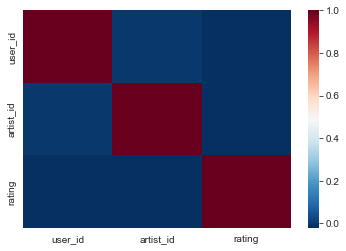

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the Pearson correlation between artist ratings and accuracy
corr = artist_data.corr(method='pearson')

# Create a heatmap of the correlation values
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='RdBu_r')

# Show the plot
plt.show()

# visualization of the Pearson correlation between song ratings and accuracy 

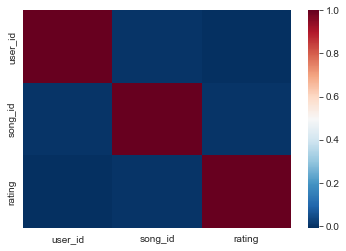

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the Pearson correlation between artist ratings and accuracy
corr = songs_data.corr(method='pearson')

# Create a heatmap of the correlation values
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='RdBu_r')

# Show the plot
plt.show()